In [515]:
import pandas as pd
import math
# from fancyimpute import KNN, MICE
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt


In [516]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
# train.Fare.hist(by=train['Survived'], bins=50)

full = pd.concat([train.drop(columns='Survived'), test], axis=0)
test_passenger_ids = test['PassengerId']

In [517]:
print(full.isna().any())


PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool


In [518]:
full[full['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [519]:
"""Replacing the missing values of Emabarked with S, which is the mode of the data."""

'Replacing the missing values of Emabarked with S, which is the mode of the data.'

In [520]:
#Impute missing Embarked feature
full.Embarked.fillna('S', inplace=True)

#Convert Embarked to numerical value
full['Embarked'] = LabelEncoder().fit_transform(full['Embarked'])
# indices_in_frequency_order = full.Embarked.value_counts().index
# full.Embarked = full.Embarked.map(dict(zip(full.Embarked.value_counts().index, range(0, len(full.Embarked.value_counts().index)))))


In [521]:
"""Dropping Ticket column as it doesn't seem to be useful"""
full.drop(columns=['Ticket', 'PassengerId'], inplace=True)

In [522]:
#Add deck feature
full['Cabin'] = full['Cabin'].fillna('@') #because its ord is 1 less than 'A'

#Convert cabin to deck info
full['Deck'] = full.apply(lambda x: x.Cabin.upper()[0], axis=1)

#Convert categorial deck info to numbers
full['Deck'] = LabelEncoder().fit_transform(full['Deck'])

#Drop cabin as it is not useful now
full.drop(columns=['Cabin'], inplace=True)

In [523]:
print(full.isna().any())
print(len(full))

Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
Deck        False
dtype: bool
1309


In [524]:
# Add Title attribute 
#Binning title info
TITLE_REGEXP = ' [A-Za-z]+\.'

full['Title'] = full.apply(lambda row: re.search(TITLE_REGEXP, row.Name).group(0).strip(' .'), axis=1)

normalized_titles = {
    "Capt":       "Mr",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Mr",
    "Don":        "Mr",
    "Sir" :       "Royalty",
    "Dr":         "Dr",
    "Rev":        "Mr",
    "the Countess":"Royalty",
    "Countess":   "Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

full.Title = full.Title.map(normalized_titles)
# print(full.Title.value_counts())

full.Title = LabelEncoder().fit_transform(full.Title)

#Drop name as it is not interesting anymore
full.drop(columns=['Name'], inplace=True)

# print(full.isna().any())

In [525]:
#Imputing Age data based on title,pclass and sex
grouped = full.groupby(['Sex', 'Pclass', 'Title'])
full['Age'] = grouped.Age.transform(lambda x: x.fillna(x.median()))

full.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,3,male,22.0,1,0,7.2500,2,0,3
1,1,female,38.0,1,0,71.2833,0,3,4
2,3,female,26.0,0,0,7.9250,2,0,2
3,1,female,35.0,1,0,53.1000,2,3,4
4,3,male,35.0,0,0,8.0500,2,0,3


In [526]:
#Impute missing fare data similarly to missing age data
grouped = full.groupby(['Pclass'])
full['Fare'] = grouped.Fare.transform(lambda x: x.fillna(x.median()))

print(full.isna().any())

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
Deck        False
Title       False
dtype: bool


In [527]:
# Convert Sex to numerical
full['Sex'] = LabelEncoder().fit_transform(full['Sex'])

In [528]:
#Add family-size feature
full['FamilySize'] = full.apply(lambda row: row.SibSp + row.Parch+1.0, axis=1)


In [529]:
#Add alone feature
full['IsAlone'] = full.apply(lambda x: 1 if x.SibSp==0 and x.Parch==0 else 0.0, axis =1)

In [530]:

# colnames = x_full.columns
# print(colnames)
# print(x_full.isna().any())
# x_full = pd.DataFrame(MICE().complete(x_full))
# x_full.columns = colnames
# full.drop(columns=['Title', 'Deck'], inplace=True)

In [531]:
#Bin fares
bins = [-1,20,100,200,400,1000000]
full['Fare'] = np.searchsorted(bins, full['Fare'].values)

In [532]:
#Bin ages
bins = [0,12,17,55,75,120]
full['Age'] = np.searchsorted(bins, full['Age'].values)
# full = full.astype(dtype='float64', copy=False)

In [533]:
#Bin family size
bins = [0,2,5,12]
full['FamilySize'] = np.searchsorted(bins, full['FamilySize'].values)


In [534]:
#Bin sibings
bins = [0,1,3,5,10]
full['SibSp'] = np.searchsorted(bins, full['SibSp'].values)


In [535]:
# columns = full.columns
# full = pd.DataFrame(MinMaxScaler().fit_transform(full), columns=columns)

# full.head()


/Users/goelakas/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


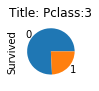

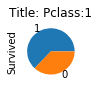

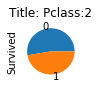

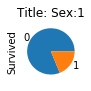

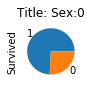

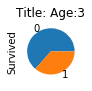

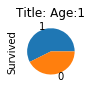

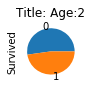

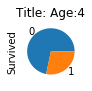

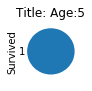

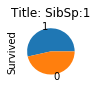

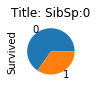

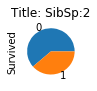

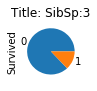

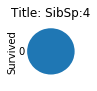

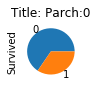

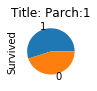

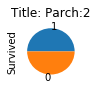

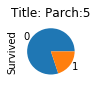

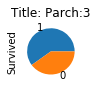

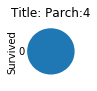

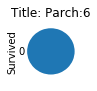

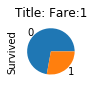

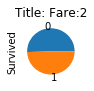

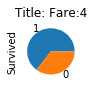

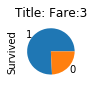

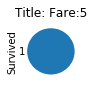

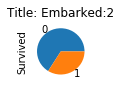

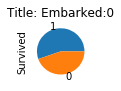

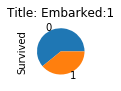

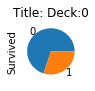

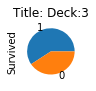

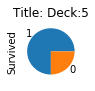

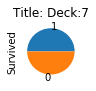

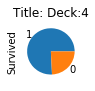

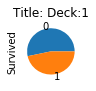

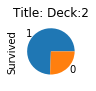

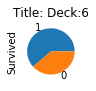

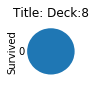

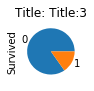

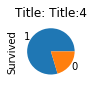

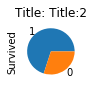

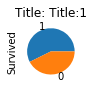

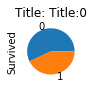

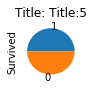

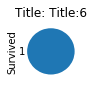

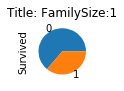

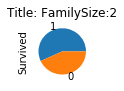

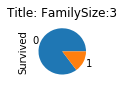

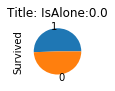

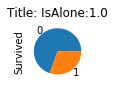

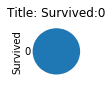

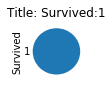

In [536]:
X_train = full[:891]
X_test = full[891:]

#Labels for the training and validation set
Y_train_vector = np.asarray([[0, 1] if int(y) == 1 else [1, 0] for y in train.Survived])
Y_train = train.Survived

i=1
XY_complete = pd.concat([X_train, Y_train], axis=1)
XY_complete.head()
for col in XY_complete.columns:
    for cat in XY_complete[col].unique():
        fig = plt.figure(figsize=(10,10))
        fig.add_subplot(8,8,i)
        i+=1
        plt.title('Title: '+col+":"+str(cat))
        XY_complete.Survived[XY_complete[col] == cat].value_counts().plot(kind='pie')


In [537]:
# import keras
# from keras.models import Sequential
# from keras.metrics import categorical_accuracy
# from keras.layers import Dense, Dropout, Activation
# from keras.layers.normalization import BatchNormalization
# from keras.utils import to_categorical
# from sklearn.cross_validation import train_test_split , StratifiedKFold
# from sklearn.preprocessing import OneHotEncoder

# print(Y_train_vector[0])
# train_data, val_data, train_label,  val_label = train_test_split(X_train, Y_train_vector, test_size=0.2)
# print(train_data.shape)
# print(val_data.shape)
# NUM_CLASSES = 2
# BATCH_SIZE = 32
# N_EPOCHS = 200
# # KERNEL_SIZE = 3
# # ROWS = 28
# # COLUMNS = 28
# # CHANNELS = 1

# model = Sequential()
# model.add(Dense(256, input_shape=(train_data.shape[1], )))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(keras.layers.core.Dropout(0.5))
# model.add(Dense(128))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(keras.layers.core.Dropout(0.5))
# model.add(Dense(64))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dense(2, activation='relu'))

# model.compile(loss=keras.losses.binary_crossentropy,
#               optimizer=keras.optimizers.Adam(), metrics=[categorical_accuracy])

# model.fit(train_data, train_label, epochs=N_EPOCHS, verbose=1, validation_data=(val_data, val_label))
# score = model.evaluate(val_data, val_label)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# predictions = model.predict(X_test)
# result_keras = pd.DataFrame()
# result_keras['PassengerId'] = test_passenger_ids


In [538]:
# import keras
# from keras.models import Sequential
# from keras.metrics import categorical_accuracy
# from keras.layers import Dense, Dropout, Activation
# from keras.layers.normalization import BatchNormalization
# from keras.utils import to_categorical
# from sklearn.cross_validation import train_test_split , StratifiedKFold
# from sklearn.preprocessing import OneHotEncoder

# print(Y_train_vector[0])
# train_data, val_data, train_label,  val_label = train_test_split(X_train, Y_train_vector, test_size=0.2)
# print(train_data.shape)
# print(val_data.shape)
# NUM_CLASSES = 2
# BATCH_SIZE = 32
# N_EPOCHS = 200
# # KERNEL_SIZE = 3
# # ROWS = 28
# # COLUMNS = 28
# # CHANNELS = 1

# model = Sequential()
# model.add(Dense(256, input_shape=(train_data.shape[1], )))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(keras.layers.core.Dropout(0.5))
# model.add(Dense(128))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(keras.layers.core.Dropout(0.5))
# model.add(Dense(64))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dense(2, activation='relu'))

# model.compile(loss=keras.losses.binary_crossentropy,
#               optimizer=keras.optimizers.Adam(), metrics=[categorical_accuracy])

# model.fit(train_data, train_label, epochs=N_EPOCHS, verbose=1, validation_data=(val_data, val_label))
# score = model.evaluate(val_data, val_label)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# predictions = model.predict(X_test)
# result_keras = pd.DataFrame()
# result_keras['PassengerId'] = test_passenger_ids


In [539]:
# result_keras['Survived'] = [np.argmax(p) for p in predictions]
# result_keras.to_csv('result_keras.csv', index=False)

In [540]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss

classifiers = [
    KNeighborsClassifier(3),
    LinearSVC(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
#     LinearDiscriminantAnalysis(),
#     QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    ExtraTreesClassifier()]

v_classifiers = [
    KNeighborsClassifier(3),
#     LinearSVC(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
#     LinearDiscriminantAnalysis(),
#     QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    ExtraTreesClassifier()]

voting_classifier = VotingClassifier(estimators=[(str(i),v_classifiers[i]) for i in range(len(v_classifiers))] , voting='soft')

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)



In [541]:
acc_dict = {}
for train_index, val_index in sss.split(X_train, Y_train):
    x_tr, x_va = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_va = Y_train.iloc[train_index], Y_train.iloc[val_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
#         print(name)
        clf.fit(x_tr, y_tr)
        predictions = clf.predict(x_va)
        acc = accuracy_score(y_va, predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
            
            
            
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]/10.0
    
print(acc_dict)

{'KNeighborsClassifier': 0.7888888888888889, 'LinearSVC': 0.7988888888888888, 'SVC': 0.8233333333333335, 'DecisionTreeClassifier': 0.8088888888888887, 'RandomForestClassifier': 0.8144444444444442, 'AdaBoostClassifier': 0.8255555555555555, 'GradientBoostingClassifier': 0.8388888888888889, 'GaussianNB': 0.7866666666666666, 'LogisticRegression': 0.7999999999999999, 'ExtraTreesClassifier': 0.8044444444444443}


In [542]:
#We'll use the best classifer out of all the above

final_predictions = []
for clf in classifiers:
    if clf.__class__.__name__ == 'GradientBoostingClassifier':
        final_predictions = clf.predict(X_test)

In [543]:
final_predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [544]:
result = pd.DataFrame()
result['PassengerId'] = test_passenger_ids
result['Survived'] = final_predictions

In [545]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [546]:
result.to_csv('result_13_data_analysis_and_proper_binning.csv', index=False)